# [SemEval 2023 Task 1](https://raganato.github.io/vwsd/)

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import keras
import random

2022-12-30 00:27:41.266859: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-30 00:27:41.837398: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-30 00:27:41.837468: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-30 00:27:41.837474: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
# to access google drive folder
# from google.colab import drive
# drive.mount('/content/drive') # When you run this you'll be prompted for a token - follow the link to generate this.
#        "/content/drive/MyDrive/...path/to/dir
# path = "/content/drive/MyDrive/msc-data-science/2-image-dataset/"

# Comment this out if you are using Google Colab, otherwise just change to local directory where the data is located
path = "/mnt/d/Abdullah LOL/BigData/semeval-2023-task-1-V-WSD-train-v1/"

In [3]:
import os
os.listdir(path)

['README', 'train_v1', 'trial_v1']

# *First Using Trial Data*

This is to check everything is working as expected

In [4]:
# Laoding Data
dataset = pd.read_csv(path + "trial_v1/trial.data.v1.txt", 
                sep = "\t", 
                names = ["target_word", "full_phrase", "image_1", "image_2", "image_3", "image_4",
                         "image_5", "image_6", "image_7", "image_8", "image_9", "image_10"])

In [5]:
dataset.head()

,target_word,full_phrase,image_1,image_2,image_3,image_4,image_5,image_6,image_7,image_8,image_9,image_10
0,andromeda,andromeda tree,image.155.jpg,image.68.jpg,image.9.jpg,image.72.jpg,image.158.jpg,image.86.jpg,image.7.jpg,image.132.jpg,image.36.jpg,image.27.jpg
1,angora,angora city,image.5.jpg,image.52.jpg,image.96.jpg,image.70.jpg,image.46.jpg,image.91.jpg,image.76.jpg,image.139.jpg,image.14.jpg,image.115.jpg
2,anteater,marsupial anteater,image.147.jpg,image.16.jpg,image.107.jpg,image.135.jpg,image.93.jpg,image.59.jpg,image.88.png,image.131.jpg,image.89.jpg,image.121.jpg
3,bank,bank erosion,image.104.jpg,image.64.jpg,image.108.jpg,image.80.jpg,image.21.jpg,image.99.jpg,image.117.jpg,image.146.jpg,image.87.jpg,image.34.jpg
4,router,internet router,image.127.jpg,image.0.jpg,image.20.jpg,image.18.jpg,image.112.jpg,image.97.jpg,image.24.jpg,image.1.jpg,image.56.jpg,image.26.jpg


In [6]:
gold_labels = open(path + "trial_v1/trial.gold.v1.txt").read().splitlines()

In [7]:
print(len(gold_labels))
print(gold_labels)

16
['image.86.jpg', 'image.70.jpg', 'image.107.jpg', 'image.64.jpg', 'image.18.jpg', 'image.156.jpg', 'image.54.jpg', 'image.28.jpg', 'image.124.jpg', 'image.118.jpg', 'image.71.jpg', 'image.134.jpg', 'image.25.jpg', 'image.149.jpg', 'image.85.jpg', 'image.103.jpg']


## Create NumPy out of Gold Labels Images and Creating NumPy Labels for Target Word + Full Phrase in Order of Gold Label

In [8]:
print(os.listdir(path + "trial_v1/trial_images_v1/"))

['image.0.jpg', 'image.1.jpg', 'image.10.jpg', 'image.100.jpg', 'image.101.jpg', 'image.102.jpg', 'image.103.jpg', 'image.104.jpg', 'image.105.jpg', 'image.106.jpg', 'image.107.jpg', 'image.108.jpg', 'image.109.jpg', 'image.11.jpg', 'image.110.jpg', 'image.111.jpg', 'image.112.jpg', 'image.113.jpg', 'image.114.jpg', 'image.115.jpg', 'image.116.jpg', 'image.117.jpg', 'image.118.jpg', 'image.119.jpg', 'image.12.jpg', 'image.120.jpg', 'image.121.jpg', 'image.122.jpg', 'image.123.jpg', 'image.124.jpg', 'image.125.jpg', 'image.126.jpg', 'image.127.jpg', 'image.128.jpg', 'image.129.jpg', 'image.13.jpg', 'image.130.jpg', 'image.131.jpg', 'image.132.jpg', 'image.133.jpg', 'image.134.jpg', 'image.135.jpg', 'image.136.jpg', 'image.137.jpg', 'image.138.jpg', 'image.139.jpg', 'image.14.jpg', 'image.140.jpg', 'image.141.jpg', 'image.142.jpg', 'image.143.jpg', 'image.144.jpg', 'image.145.jpg', 'image.146.jpg', 'image.147.jpg', 'image.148.jpg', 'image.149.jpg', 'image.15.jpg', 'image.150.jpg', 'image

In [9]:
print([path + "trial_v1/trial_images_v1/" + image for image in gold_labels])

['/mnt/d/Abdullah LOL/BigData/semeval-2023-task-1-V-WSD-train-v1/trial_v1/trial_images_v1/image.86.jpg', '/mnt/d/Abdullah LOL/BigData/semeval-2023-task-1-V-WSD-train-v1/trial_v1/trial_images_v1/image.70.jpg', '/mnt/d/Abdullah LOL/BigData/semeval-2023-task-1-V-WSD-train-v1/trial_v1/trial_images_v1/image.107.jpg', '/mnt/d/Abdullah LOL/BigData/semeval-2023-task-1-V-WSD-train-v1/trial_v1/trial_images_v1/image.64.jpg', '/mnt/d/Abdullah LOL/BigData/semeval-2023-task-1-V-WSD-train-v1/trial_v1/trial_images_v1/image.18.jpg', '/mnt/d/Abdullah LOL/BigData/semeval-2023-task-1-V-WSD-train-v1/trial_v1/trial_images_v1/image.156.jpg', '/mnt/d/Abdullah LOL/BigData/semeval-2023-task-1-V-WSD-train-v1/trial_v1/trial_images_v1/image.54.jpg', '/mnt/d/Abdullah LOL/BigData/semeval-2023-task-1-V-WSD-train-v1/trial_v1/trial_images_v1/image.28.jpg', '/mnt/d/Abdullah LOL/BigData/semeval-2023-task-1-V-WSD-train-v1/trial_v1/trial_images_v1/image.124.jpg', '/mnt/d/Abdullah LOL/BigData/semeval-2023-task-1-V-WSD-train

In [10]:
# Gold Labels NumPy
# Read image then convert it into RGB for all gold_labels then make that list as a NumPy Array
glnp = np.array([cv2.cvtColor(cv2.imread(path + "trial_v1/trial_images_v1/" + image), cv2.COLOR_BGR2RGB) for image in gold_labels], dtype=object)

# target_word labels corresponding to the order of glnp above
tw_labels = np.array([target_word for target_word in dataset["target_word"]])

# full_phrase labels corresponding to the order of glnp above
fp_labels = np.array([full_phrase for full_phrase in dataset["full_phrase"]])

In [11]:
print(tw_labels.shape)
print(random.choice(tw_labels).shape)
print(tw_labels)

(16,)
()
['andromeda' 'angora' 'anteater' 'bank' 'router' 'stick' 'swing' 'tube'
 'venus' 'wheel' 'white' 'acrobatics' 'adalia' 'administration' 'amber'
 'ambrosia']


In [12]:
print(fp_labels.shape)
print(random.choice(fp_labels).shape)
print(fp_labels)

(16,)
()
['andromeda tree' 'angora city' 'marsupial anteater' 'bank erosion'
 'internet router' 'centre stick' 'swing hit' 'london tube'
 'venus surface' 'breaking wheel' 'white yolk' 'acrobatics maneuvers'
 'biology adalia' 'administration prime minister' 'amber bijoux'
 'ambrosia food']


In [13]:
print(glnp.shape)
print(random.choice(glnp).shape)

(16,)
(1536, 2048, 3)


In [14]:
print(glnp.shape[0])
print(random.randint(0, glnp.shape[0] - 1))

16
1


Text(0.5, 1.0, 'Target Word: acrobatics, Full Phrase: acrobatics maneuvers, Shape: (1685, 2508, 3)')

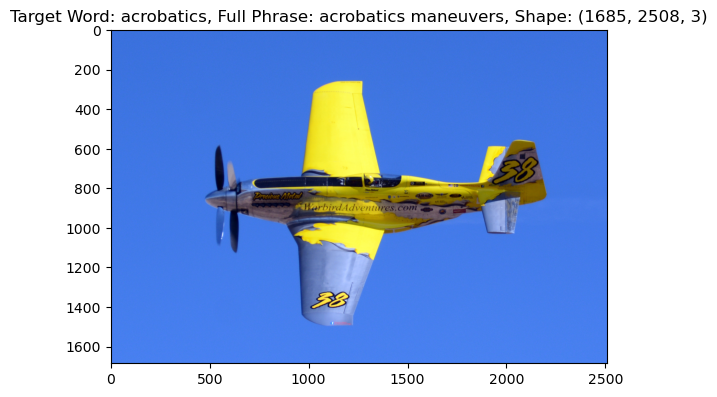

In [15]:
choice = random.randint(0, glnp.shape[0] - 1)
plt.imshow(glnp[choice])
plt.title(f"Target Word: {tw_labels[choice]}, Full Phrase: {fp_labels[choice]}, Shape: {glnp[choice].shape}")